In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from subprocess import check_output
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA, PCA
import pandas as pd
import seaborn as sns
from skimage import io
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import mean_squared_error
import scipy
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
import h5py
import tensorflow as tf
from sklearn.svm import SVC
from utils import * # image processing functions from utils.py
import time

# Some code from lab sheets

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#data = fashion_mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
X_train= X_train[:10000]
Y_train= Y_train[:10000]

print(X_train.shape)
print(Y_train.shape)



(10000, 28, 28)
(10000,)


In [4]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
#X_train_lol = X_train.reshape(X_train.shape[1], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)


(10000, 784)
(10000, 784)


In [5]:
X_train_std = StandardScaler().fit_transform(X_train_reshaped)
X_test_std = StandardScaler().fit_transform(X_test_reshaped)
print(X_train_std.shape)

(10000, 784)


In [8]:
#X_train_2 = X_train_scaled[:, :2]
#X_test_2 = X_test_scaled[:, :2]
#print(X_train_2.shape)
#print(X_test_2.shape)

In [6]:
def plot_clf(clf):
    h = 0.01
    xx, yy = np.meshgrid(np.arange(-5, 4, h), np.arange(-2, 7, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
    ax.scatter(x1,y1)
    ax.scatter(x2,y2)
    ax.set_xlim([-5,4])
    ax.set_ylim([-2,7])
    ax.set_xlabel('X')
    ax.set_ylabel('y')

In [7]:
print(X_train_std.shape)
print(X_test_std.shape)

(10000, 784)
(10000, 784)


In [8]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_train_std)
X_pca_test = pca.fit_transform(X_test_std)

In [11]:
#x_min, x_max = X_pca[:, 0].min() - .5, X_pca[:, 0].max() + .5
#y_min, y_max = X_pca[:, 1].min() - .5, X_pca[:, 1].max() + .5
#h = .02  # step size in the mesh
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

SVM classifier accuracy: (0.9714, 0.8647)


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


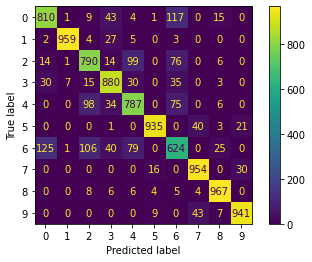

In [9]:
model_rbf_train = SVC(kernel='rbf', C = 4)
model_rbf_train.fit(X_train_std, Y_train)
print(f'SVM classifier accuracy: {model_rbf_train.score(X_train_std, Y_train), model_rbf_train.score(X_test_std, Y_test)}')

plot_confusion_matrix(model_rbf_train, X_test_std, Y_test)

In [10]:
train_sizes, train_scores, val_scores = learning_curve(model_rbf_train, X_train_std, Y_train, cv=2, scoring='accuracy', n_jobs=3, train_sizes=np.linspace(0.01, 1, 10), verbose=1)

[learning_curve] Training set sizes: [  50  600 1150 1700 2250 2800 3350 3900 4450 5000]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.9min finished


In [11]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

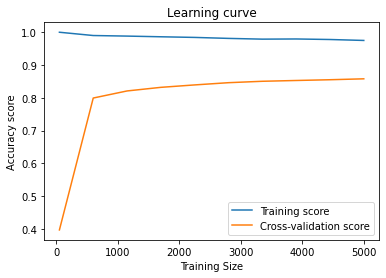

In [12]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [13]:
model_rbf_test = SVC(kernel='rbf', C = 4)
model_rbf_test.fit(X_test_std, Y_test)

SVC(C=4)

In [14]:
test_sizes, test_scores, val_scores = learning_curve(model_rbf_test, X_test_std, Y_test, cv=2, scoring='accuracy', n_jobs=3, train_sizes=np.linspace(0.01, 1, 10), verbose=1)

[learning_curve] Training set sizes: [  50  600 1150 1700 2250 2800 3350 3900 4450 5000]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.4min finished


In [15]:
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

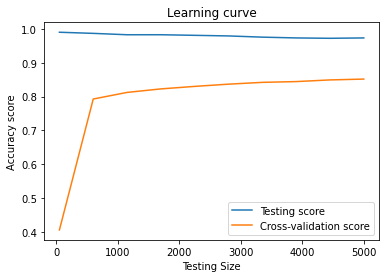

In [16]:
plt.plot(test_sizes, test_mean, label='Testing score')
plt.plot(test_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Testing Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [28]:

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1, 3, 5, 10]}]


model_rbf_train = SVC(kernel='rbf')

model_rbf_train_cv = GridSearchCV(estimator = model_rbf_train, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 3,
                        return_train_score=True,
                        n_jobs=-1)      

model_rbf_train_cv.fit(X_train_std, Y_train)
model_rbf_train_cv.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'C': 5, 'gamma': 0.001}

[CV 1/3] END C=1, gamma=0.0001;, score=(train=0.817, test=0.805) total time=  49.5s
[CV 1/3] END C=3, gamma=0.01;, score=(train=1.000, test=0.730) total time= 2.4min
[CV 2/3] END C=3, gamma=1e-05;, score=(train=0.768, test=0.773) total time= 1.2min
[CV 1/3] END C=5, gamma=0.0001;, score=(train=0.872, test=0.840) total time=  43.2s
[CV 3/3] END C=5, gamma=1e-05;, score=(train=0.794, test=0.777) total time=  55.8s
[CV 2/3] END C=10, gamma=0.0001;, score=(train=0.889, test=0.852) total time=  35.2s
[CV 2/3] END C=1, gamma=0.0001;, score=(train=0.814, test=0.806) total time=  49.3s
[CV 3/3] END C=1, gamma=1e-05;, score=(train=0.730, test=0.718) total time= 1.7min
[CV 2/3] END C=3, gamma=0.0001;, score=(train=0.851, test=0.835) total time=  36.3s
[CV 2/3] END C=5, gamma=0.01;, score=(train=1.000, test=0.728) total time= 2.5min
[CV 1/3] END C=10, gamma=0.001;, score=(train=0.987, test=0.866) total time=  35.0s
[CV 3/3] END C=10, gamma=0.0001;, score=(train=0.891, test=0.847) total time=  34.

In [25]:
model_rbf_train5 = SVC(kernel='rbf', C = 5, gamma = 0.001)
model_rbf_train5.fit(X_train_std, Y_train)
print(model_rbf_train5.score(X_train_std, Y_train))
print(model_rbf_train5.score(X_test_std, Y_test))

0.9661
0.8632


In [29]:
model_rbf_train1 = SVC(kernel='rbf', C = 1, gamma = 0.001)
model_rbf_train1.fit(X_train_std, Y_train)
print(model_rbf_train1.score(X_train_std, Y_train))
print(model_rbf_train1.score(X_test_std, Y_test))

0.908
0.8516


In [30]:
model_rbf_train10 = SVC(kernel='rbf', C = 10, gamma = 0.001)
model_rbf_train10.fit(X_train_std, Y_train)
print(model_rbf_train10.score(X_train_std, Y_train))
print(model_rbf_train10.score(X_test_std, Y_test))

0.9847
0.8644


In [32]:
model_rbf_train_g01 = SVC(kernel='rbf', C = 5, gamma = 0.01)
model_rbf_train_g01.fit(X_train_std, Y_train)
print(model_rbf_train_g01.score(X_train_std, Y_train))
print(model_rbf_train_g01.score(X_test_std, Y_test))

1.0
0.7368


In [33]:
model_rbf_train_g1 = SVC(kernel='rbf', C = 5, gamma = 0.1)
model_rbf_train_g1.fit(X_train_std, Y_train)
print(model_rbf_train_g1.score(X_train_std, Y_train))
print(model_rbf_train_g1.score(X_test_std, Y_test))

1.0
0.1538


In [19]:
model_rbf_test5 = SVC(kernel='rbf', C = 5, gamma = 0.001)
model_rbf_test5.fit(X_test_std, Y_test)
print(model_rbf_test5.score(X_test_std, Y_test))

0.9618


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


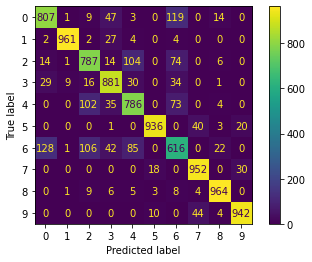

In [35]:
plot_confusion_matrix(model_rbf_train5, X_test_std, Y_test)

In [21]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_train_std)
X_pca_test = pca.fit_transform(X_test_std)

In [22]:
model_rbf_test5.fit(X_pca, Y_train)


SVC(C=5, gamma=0.001)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

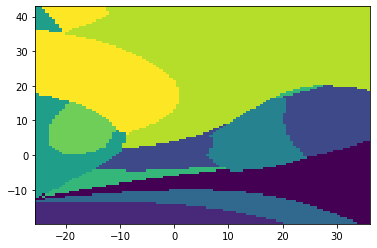

In [23]:
plt.viridis()
DecisionBoundaryDisplay.from_estimator(model_rbf_test5, X_pca ,response_method='predict',plot_method='pcolormesh')
plt_title= 'Decision Boundary ANN', 
plt.xlabel=('PC-1')
plt.ylabel= ('PC-2')
plt.show


In [49]:


start = time.time()

model_rbf_train5 = SVC(kernel='rbf', C = 5, gamma = 0.001)
model_rbf_train5.fit(X_train_std, Y_train)

end = time.time()

elapsed_time1 = end-start
print("Total training time: {:.2f} seconds".format(elapsed_time1))

print("Training set accuracy: {}".format(model_rbf_train5.score(X_train_std, Y_train)))
print("Test set accuracy: {}".format(model_rbf_train5.score(X_test_std, Y_test)))


Total training time: 10.87 seconds
Training set accuracy: 0.9661
Test set accuracy: 0.8632


In [50]:


start = time.time()

nn_clf_best = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='adam',
                    #alpha=0.7564633275546291,
                    #learning_rate_init=0.0003853528593710527,
                    alpha=0.572236765935022,
                    learning_rate_init=0.00020092330025650479,
                    max_iter=500,
                    n_iter_no_change=25,
                    random_state=1)

nn_clf_best.fit(X_train_std, Y_train)

end = time.time()

elapsed_time2 = end-start
print("Total training time: {:.2f} seconds".format(elapsed_time2))


print("Training set accuracy: {}".format(nn_clf_best.score(X_train_std, Y_train)))
print("Test set accuracy: {}".format(nn_clf_best.score(X_test_std, Y_test)))


Total training time: 41.22 seconds
Training set accuracy: 0.9942
Test set accuracy: 0.8579


/Users/emiljino/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


TypeError: 'str' object is not callable

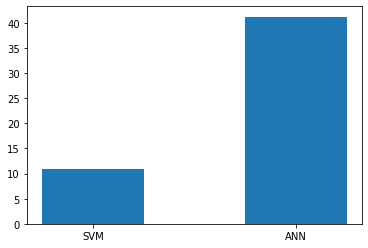

In [56]:
plt.bar([1, 2], [elapsed_time1, elapsed_time2], width=0.5, tick_label=['SVM', 'ANN'])
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title('Training Time Comparison')
plt.show()